In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,r2_score

In [34]:
df = pd.read_csv("HousePricedataset.csv")
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Garage,LocationScore,Price
0,1660,1,2,2,2010,1,3,369758.2
1,4572,5,3,2,1951,1,7,1011357.8
2,3892,4,1,1,1982,0,4,842272.3
3,1266,1,2,2,2021,0,10,288673.3
4,4244,4,3,2,2011,0,7,852445.4


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           5000 non-null   int64  
 1   Bedrooms       5000 non-null   int64  
 2   Bathrooms      5000 non-null   int64  
 3   Floors         5000 non-null   int64  
 4   YearBuilt      5000 non-null   int64  
 5   Garage         5000 non-null   int64  
 6   LocationScore  5000 non-null   int64  
 7   Price          5000 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [36]:
df.shape

(5000, 8)

In [37]:
#check for missing values 
df.isnull().sum()

Area             0
Bedrooms         0
Bathrooms        0
Floors           0
YearBuilt        0
Garage           0
LocationScore    0
Price            0
dtype: int64

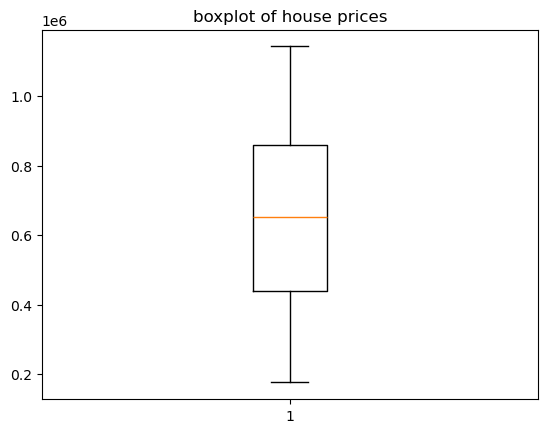

In [38]:
#outlier detection 
plt.boxplot(df['Price'])
plt.title("boxplot of house prices")
plt.show()


In [39]:
#feature target split 
#x= df[['','','']]
X=df.drop('Price',axis=1)#removing the price from x
y=df['Price']  #now y is price

In [40]:
X 

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Garage,LocationScore
0,1660,1,2,2,2010,1,3
1,4572,5,3,2,1951,1,7
2,3892,4,1,1,1982,0,4
3,1266,1,2,2,2021,0,10
4,4244,4,3,2,2011,0,7
...,...,...,...,...,...,...,...
4995,3506,2,1,1,1990,1,4
4996,801,3,2,1,1978,0,9
4997,1833,4,1,1,1986,0,3
4998,3281,1,3,2,2005,1,2


In [41]:
y #price is now y

0        369758.2
1       1011357.8
2        842272.3
3        288673.3
4        852445.4
          ...    
4995     747305.3
4996     209883.0
4997     432467.3
4998     694092.5
4999     278687.5
Name: Price, Length: 5000, dtype: float64

In [45]:
#scaling
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [47]:
X_scaled

array([[-1.05599473e+00, -1.39443839e+00,  2.46594323e-04, ...,
         1.08799489e+00,  9.99200320e-01, -8.98845081e-01],
       [ 1.35797923e+00,  1.41721276e+00,  1.23321821e+00, ...,
        -1.65723448e+00,  9.99200320e-01,  4.94821220e-01],
       [ 7.94276516e-01,  7.14299976e-01, -1.23272502e+00, ...,
        -2.14825830e-01, -1.00080032e+00, -5.50428506e-01],
       ...,
       [-9.12582130e-01,  7.14299976e-01, -1.23272502e+00, ...,
        -2.87085851e-02, -1.00080032e+00, -8.98845081e-01],
       [ 2.87773052e-01, -1.39443839e+00,  1.23321821e+00, ...,
         8.55348331e-01,  9.99200320e-01, -1.24726166e+00],
       [-1.66612002e+00,  1.41721276e+00,  1.23321821e+00, ...,
        -1.00582412e+00,  9.99200320e-01, -5.50428506e-01]],
      shape=(5000, 7))

In [49]:
#training & testing
X_train,X_test,y_train,y_test=train_test_split(
  X_scaled,y,test_size=0.2,random_state=42)   #DATA IS SPLIT IN 4 PARTS TRAING ND TESTING 
                                           #20% DATA IS TEST AND 80% IS TRAING

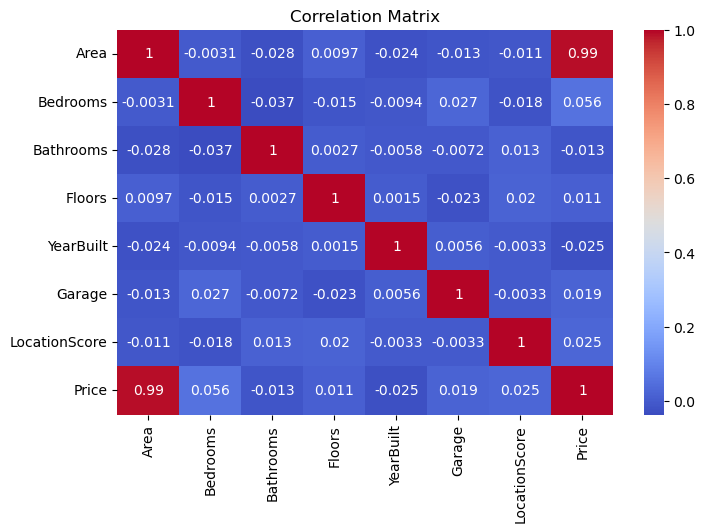

In [86]:
#CORRELATION HEATMAP
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

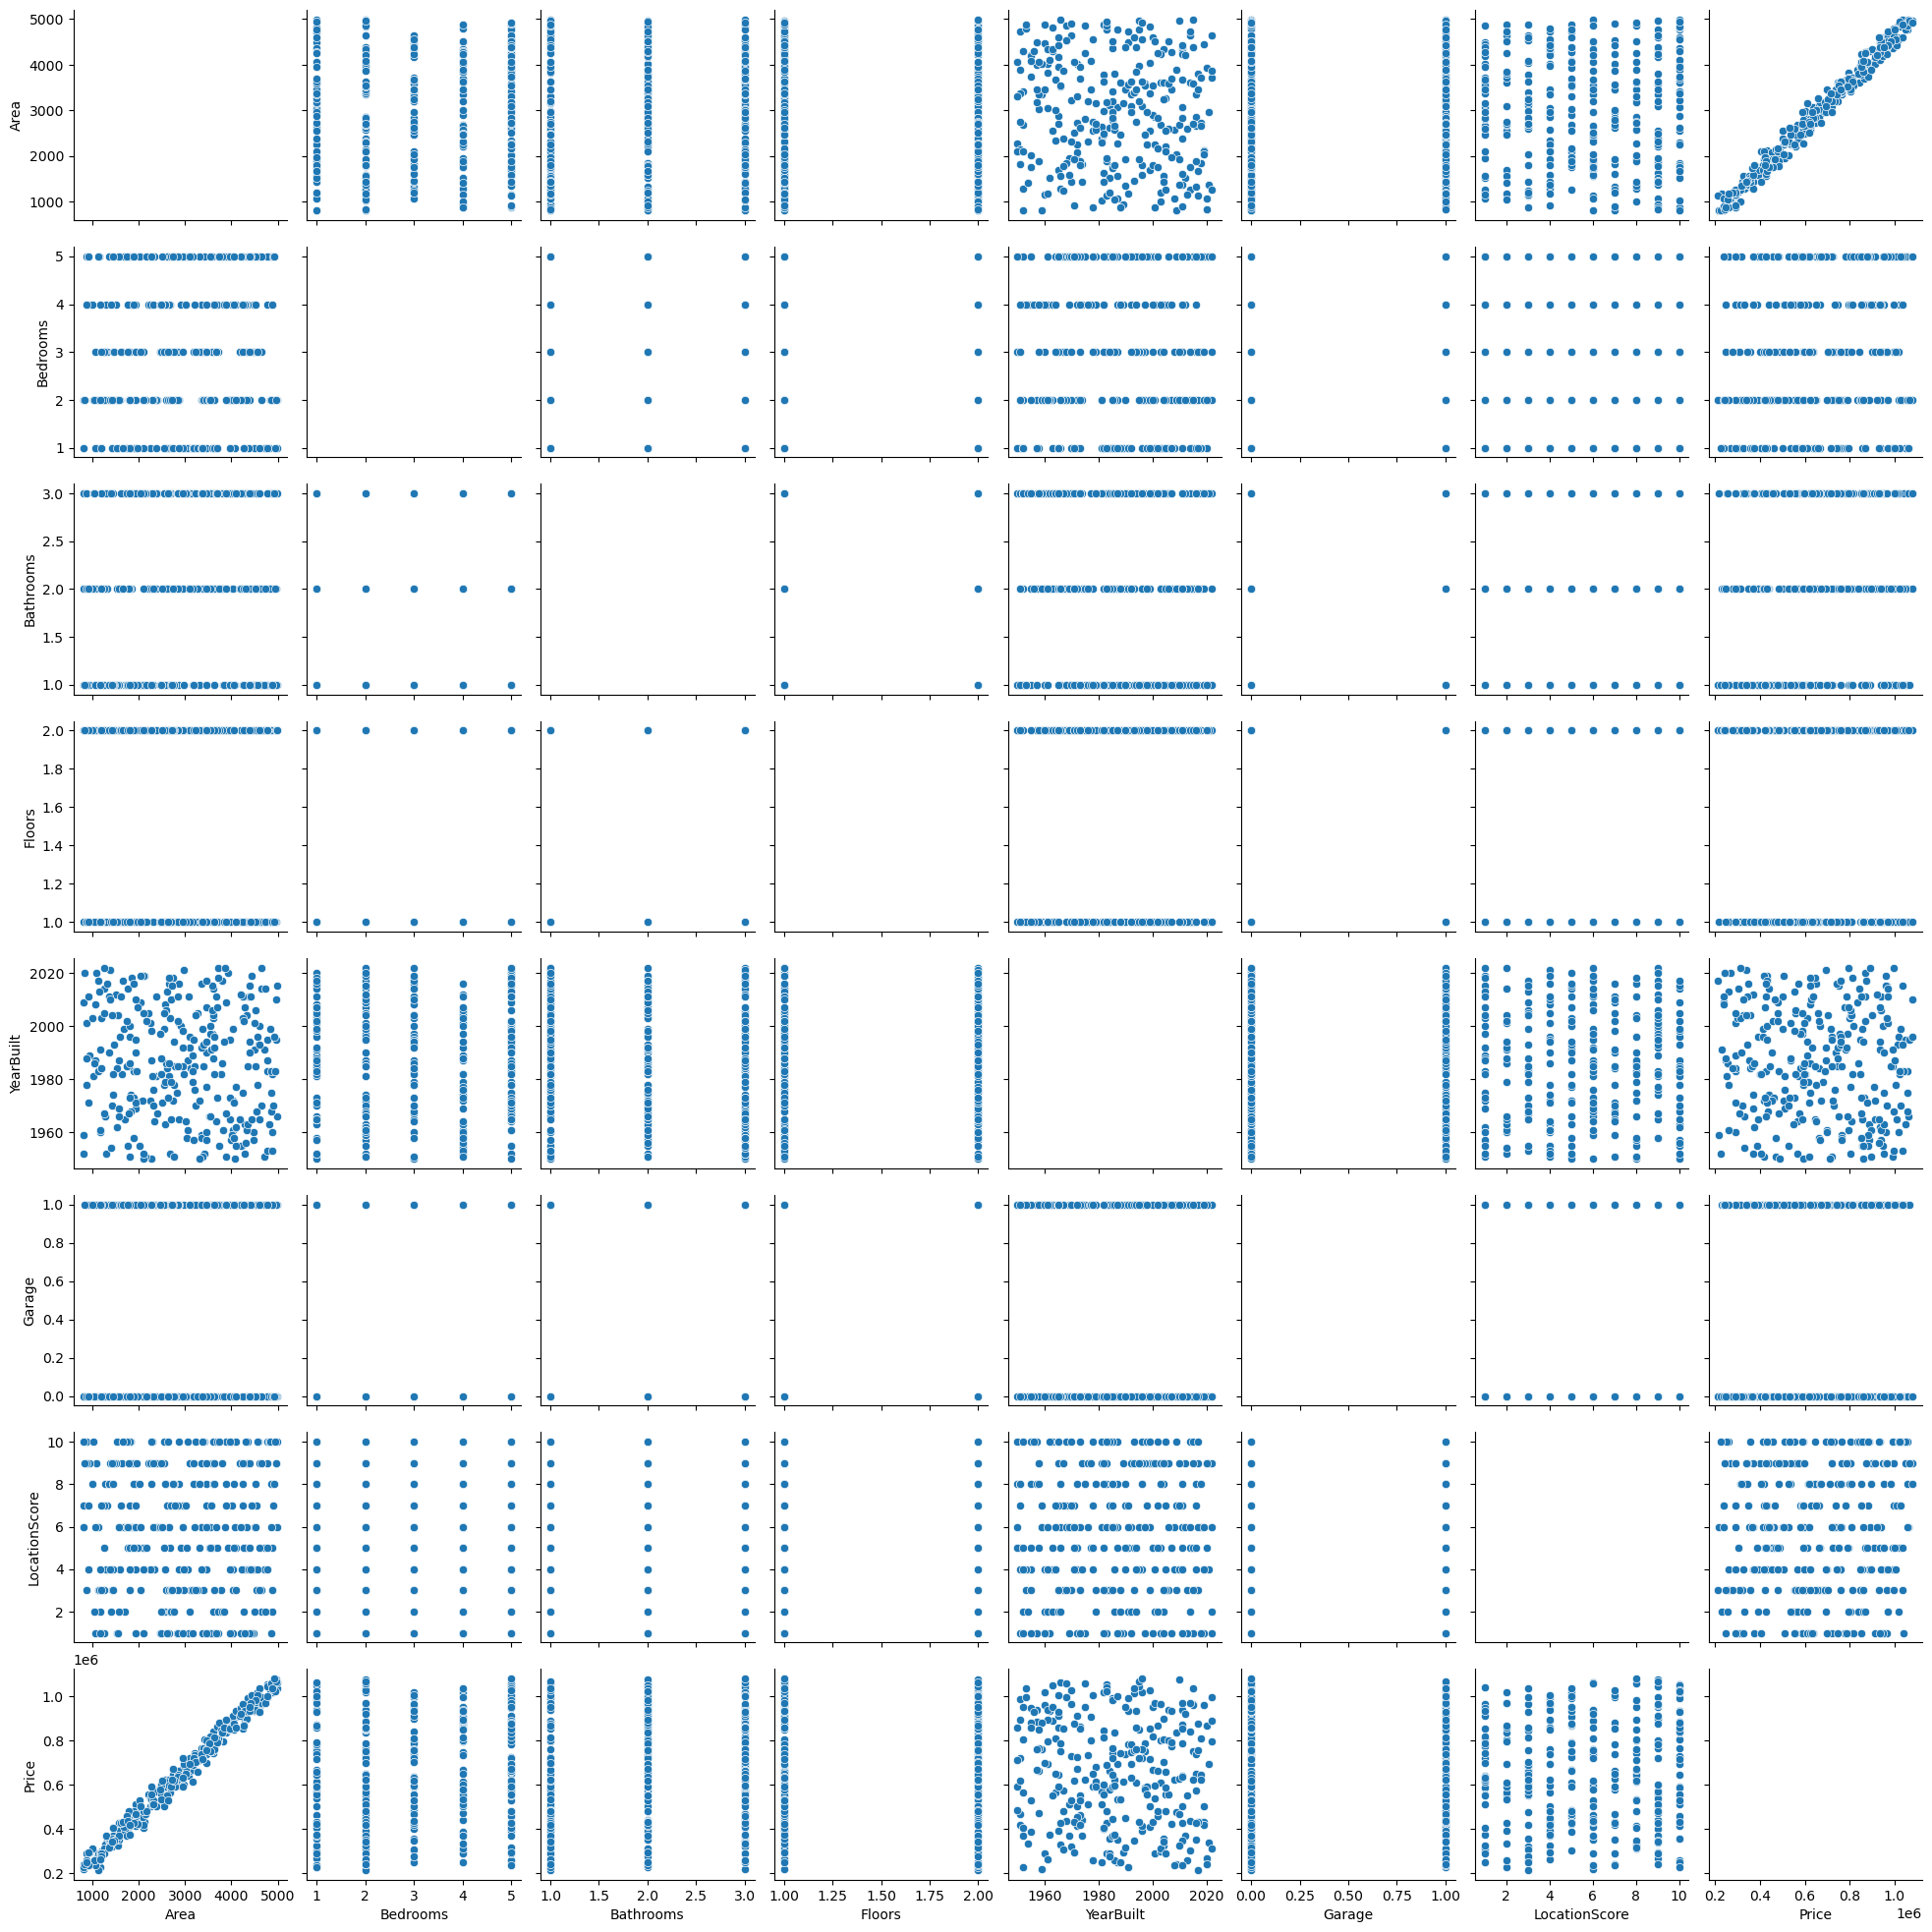

In [52]:
#pAIRPLOT 
sns.pairplot(df.sample(300),diag_kind='kide')
plt.show()

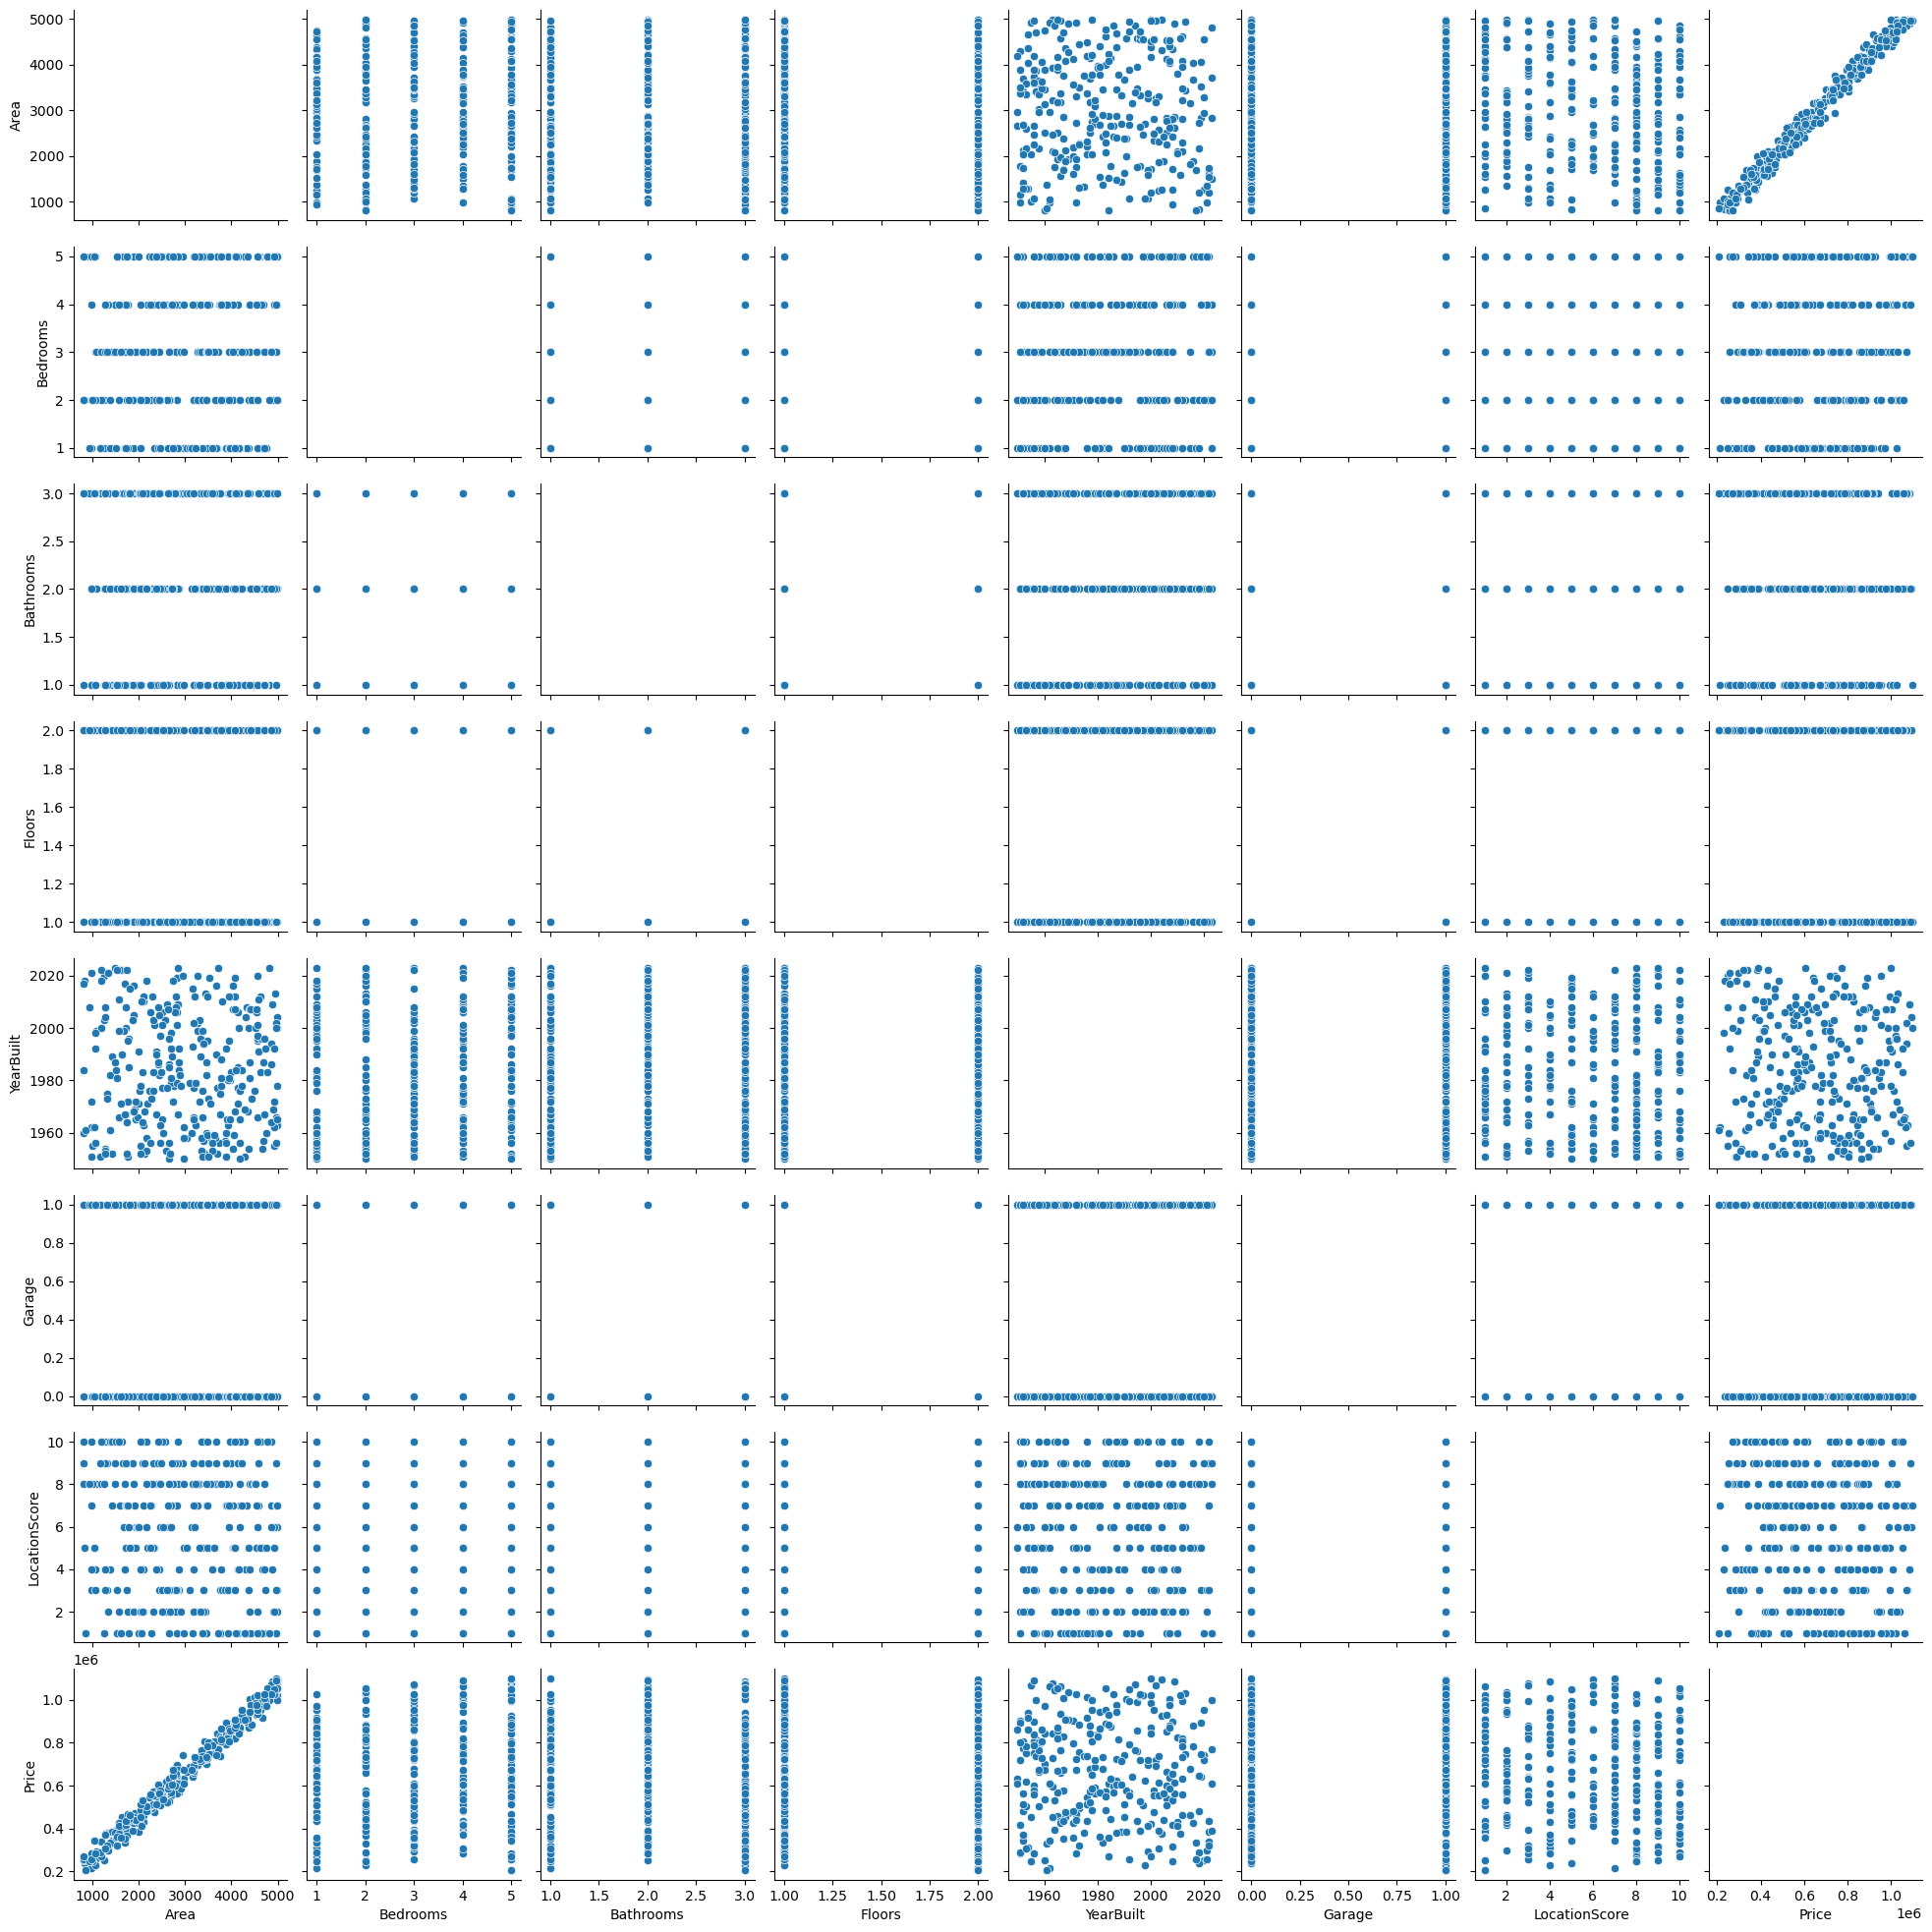

In [53]:
sns.pairplot(df.sample(300),diag_kind='kide')
plt.show()

In [56]:

model=LinearRegression()   #train data regression model is trained
model.fit(X_train,y_train)

LinearRegression()

In [78]:
#prediction
y_pred=model.predict(X_test)
#y_pred=model.predict([[2200,3,2,1,2010,1,7]])   #ouput 5.31 10^8
y_pred

array([ 636294.41828347,  573944.6103285 ,  707844.02296641,
        359656.36527797,  256200.59944115,  894446.94727123,
       1043546.71292992,  756441.65706178,  737149.85181612,
        766959.07345186,  271909.38672931,  897314.44095897,
        404667.29199497,  374127.10760351,  896601.55020856,
        546073.17580911,  357216.96557333,  565203.08285918,
       1030166.34685919,  573317.06631815,  947642.64247972,
       1000295.51123341,  661488.7168238 ,  629528.44464502,
        577883.00813622,  506940.94663751,  758696.63343734,
        909000.1712229 ,  591178.64024027, 1039522.21537745,
        866206.8840143 ,  792649.33258108,  848996.52026972,
        878758.1499396 ,  819680.02358404,  590834.58240966,
        642586.77071339,  635866.10525743,  462352.83280385,
        987283.09743426,  730113.37398574,  538176.4295247 ,
        860554.22225199,  290598.51350175, 1043340.89358313,
        536045.11731154,  291424.10509754,  818247.09908874,
        641946.34769963,

In [79]:
#y_pred=model.predict([[1660,1,2,2,2010,1,3]])   #ouput 5.31 10^8
#y_pred

In [80]:
#evaluation 
print("MSE :",mean_squared_error(y_test,y_pred))
print("R^2 Score:" ,r2_score(y_test,y_pred))

MSE : 588697300.0750788
R^2 Score: 0.9899136800135677


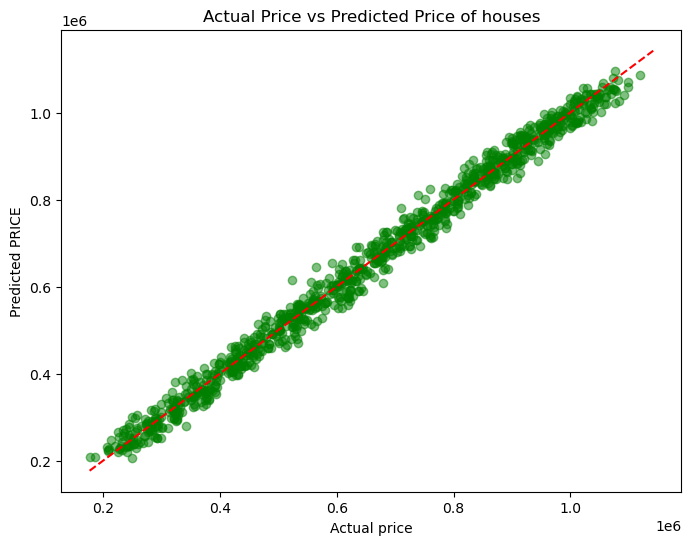

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.5,color='green')
plt.xlabel('Actual price')
plt.ylabel('Predicted PRICE')
plt.title('Actual Price vs Predicted Price of houses')
plt.plot([y.min(),y.max()],[y.min(),y.max()],'--r')
plt.show()